<a href="https://colab.research.google.com/github/29nasa/Credit_Card_Default/blob/main/Credit_Card_Default_Risk_Classification_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Objective**

This project is aimed at developing a model for predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients.

## **About the Dataset**

The data is obtained from Kaggle and has following variables:

* X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* X2: Gender (1 = male; 2 = female).
* X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* X4: Marital status (1 = married; 2 = single; 3 = others).
* X5: Age (year).
* X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

## Importing the Tools

In [ ]:
# Import all the tools

# Regular EDA (Exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# This line ensures that plots appear inside the notebook
%matplotlib inline

# Models from SK-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, ConfusionMatrixDisplay

## Loading the Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

file_name = next(iter(uploaded))

# Read the CSV file into a DataFrame
df = pd.read_csv(file_name)

# Display the first few rows of the DataFrame
df

Saving UCI_Credit_Card.csv to UCI_Credit_Card.csv


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [ ]:
df.shape # (rows, columns)

(30000, 25)

## **Data Exploration (exploratory data analysis or EDA)**
### the goal is to find more about your data and become a subject matter expert on the dataset you are working

1. What quesdtions are you trying to solve?
2. what kind of data do we have and how do we treat different types?
3. whats missing from data ands how do you deal with it?
4. ANy outliers and why should we care about them?
5. How can you add, change, or remove featyres to get more out of the data

**Renaming the depedent variable to 'target'**

In [ ]:
df.rename(columns={'default.payment.next.month': 'target'}, inplace=True)
#lets rename the last columb to 'target' as this is what is telling us if a particular customer is defaulting or not

In [ ]:
df.target.value_counts() # find how many of each class we have

,count
target,
0,23364
1,6636


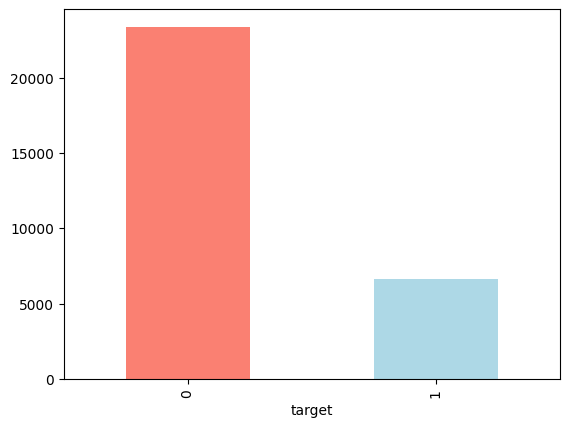

In [ ]:
df.target.value_counts().plot(kind='bar', color=['salmon', 'lightblue']);

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         30000 non-null  int64  
 1   LIMIT_BAL  30000 non-null  float64
 2   SEX        30000 non-null  int64  
 3   EDUCATION  30000 non-null  int64  
 4   MARRIAGE   30000 non-null  int64  
 5   AGE        30000 non-null  int64  
 6   PAY_0      30000 non-null  int64  
 7   PAY_2      30000 non-null  int64  
 8   PAY_3      30000 non-null  int64  
 9   PAY_4      30000 non-null  int64  
 10  PAY_5      30000 non-null  int64  
 11  PAY_6      30000 non-null  int64  
 12  BILL_AMT1  30000 non-null  float64
 13  BILL_AMT2  30000 non-null  float64
 14  BILL_AMT3  30000 non-null  float64
 15  BILL_AMT4  30000 non-null  float64
 16  BILL_AMT5  30000 non-null  float64
 17  BILL_AMT6  30000 non-null  float64
 18  PAY_AMT1   30000 non-null  float64
 19  PAY_AMT2   30000 non-null  float64
 20  PAY_AM

In [ ]:
df.isna().sum() # to find any missing values

,0
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0


**Note:** Dataset does not have any missing values

In [ ]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


## **Exploratory Data Analysis (EDA)**

**Independent Variable**

* Categorical Features: lets see how are these connected with our target variable


**1. Sex**

In [ ]:
df['SEX'].value_counts()


,count
SEX,
2,18112
1,11888


**2. Eduction**

In [ ]:
df['EDUCATION'].value_counts()


,count
EDUCATION,
2,14030
1,10585
3,4917
5,280
4,123
6,51
0,14


**Here:** 1 = graduate school; 2 = university; 3 = high school; 4 = others



* as you can see that values 0, 5, 6 and have meanings and they can all be merged or gvein the value 4 to be included in the 'Others' category

In [ ]:
df['EDUCATION'] = df['EDUCATION'].replace({5: 4, 6: 4, 0: 4})


In [ ]:
df['EDUCATION'].value_counts()


,count
EDUCATION,
2,14030
1,10585
3,4917
4,468


**3. Marriage**

Where: 1 = married; 2 = single; 3 = others

In [ ]:
df['MARRIAGE'].value_counts()


,count
MARRIAGE,
2,15964
1,13659
3,323
0,54


* same way for marriage we can include all the 0 values to 3 which is 'Others'


In [ ]:
df['MARRIAGE'] = df['MARRIAGE'].replace({0: 3})


In [ ]:
df['MARRIAGE'].value_counts()


,count
MARRIAGE,
2,15964
1,13659
3,377


### **Lets Plot these Categorical Features**

<ipython-input-15-7e480f520195>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['Defaulter'] = df['target']
<ipython-input-15-7e480f520195>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'},


<Figure size 1300x800 with 0 Axes>

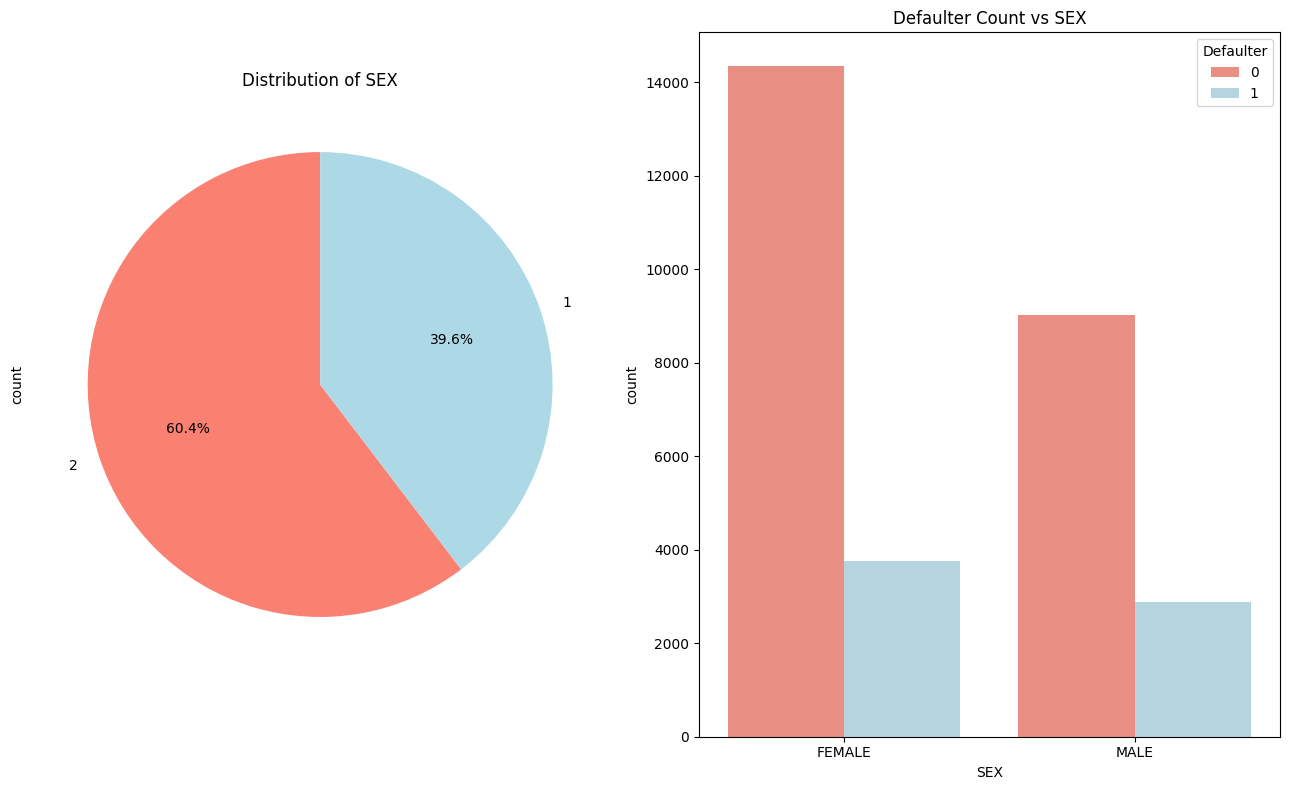

<Figure size 1300x800 with 0 Axes>

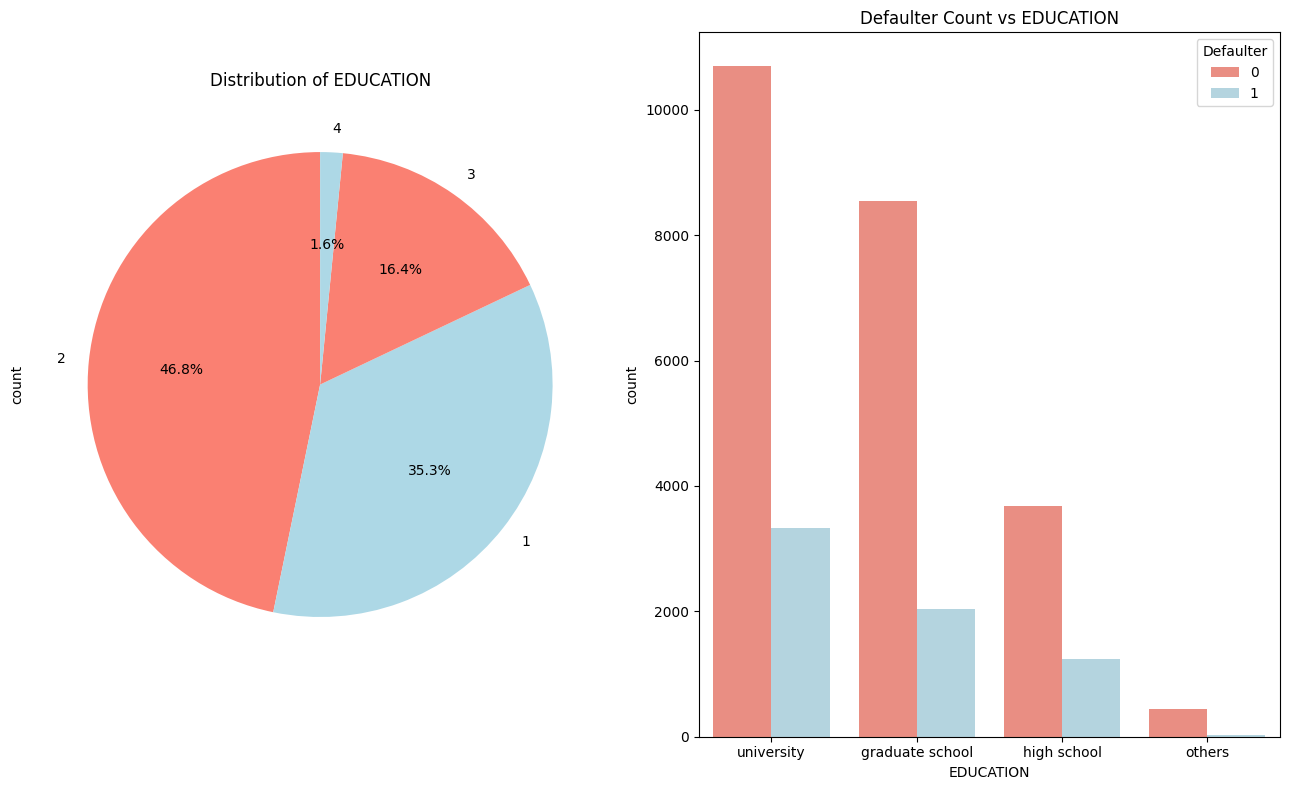

<Figure size 1300x800 with 0 Axes>

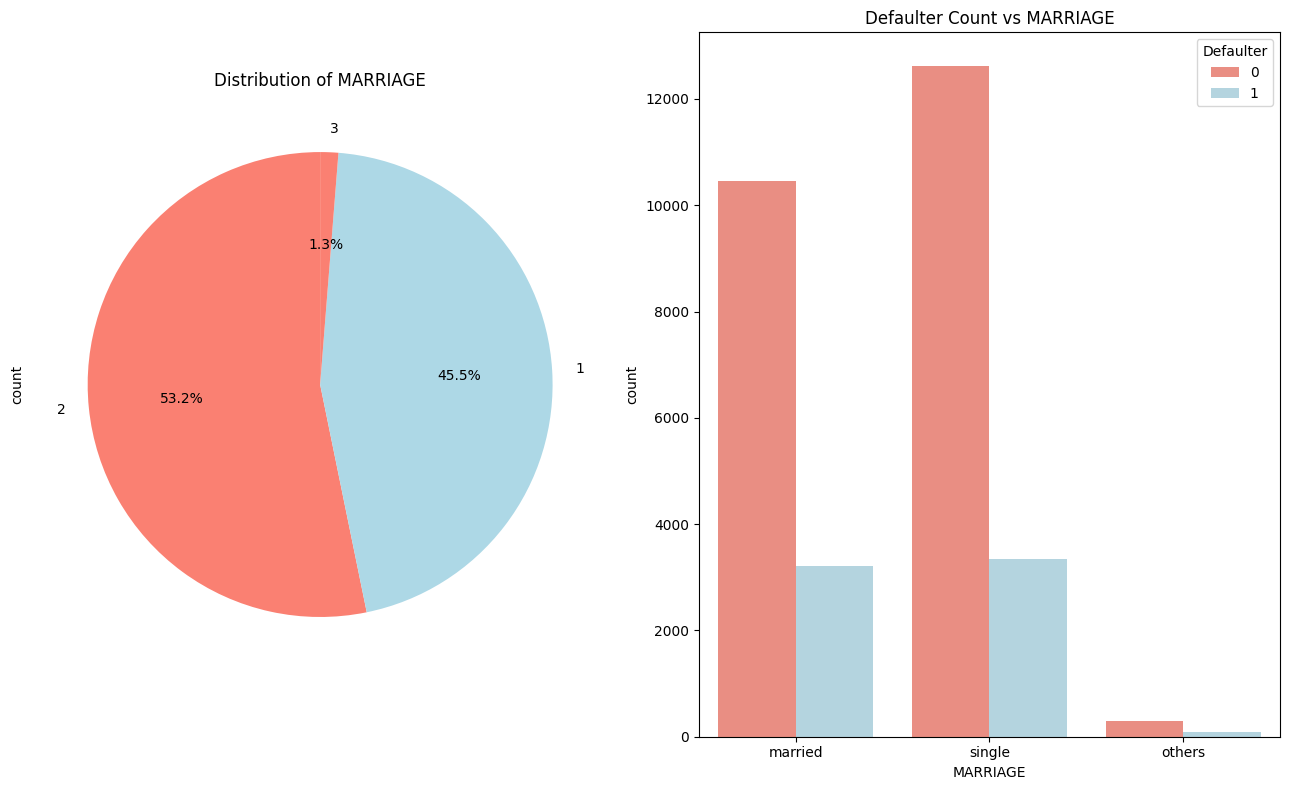

In [ ]:
# Define the categorical features
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']
df_cat = df[categorical_features]
df_cat['Defaulter'] = df['target']

# Replace values for better readability
df_cat.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'},
                'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'},
                'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace=True)

# Set custom colors
colors = ['salmon', 'lightblue']

# Loop through each categorical feature to create plots
for col in categorical_features:
    plt.figure(figsize=(13, 8))

    # Create subplots
    fig, axes = plt.subplots(ncols=2, figsize=(13, 8))

    # Plot pie chart for value counts
    df[col].value_counts().plot(kind="pie", ax=axes[0], colors=colors, autopct='%1.1f%%', startangle=90, legend=False)
    axes[0].set_title(f"Distribution of {col}")

    # Plot countplot for Defaulter vs non-Defaulter
    sns.countplot(x=col, hue='Defaulter', data=df_cat, palette=colors, ax=axes[1])
    axes[1].set_title(f"Defaulter Count vs {col}")

    # Adjust layout
    plt.tight_layout()
    plt.show()

Here are few observations on the Categorical Features:

* We have more female defaulters vs male defaulters
* University students are more likely to default compared to others
* Single people have a higher likelihood of default vs married people

**Corelation matrix**

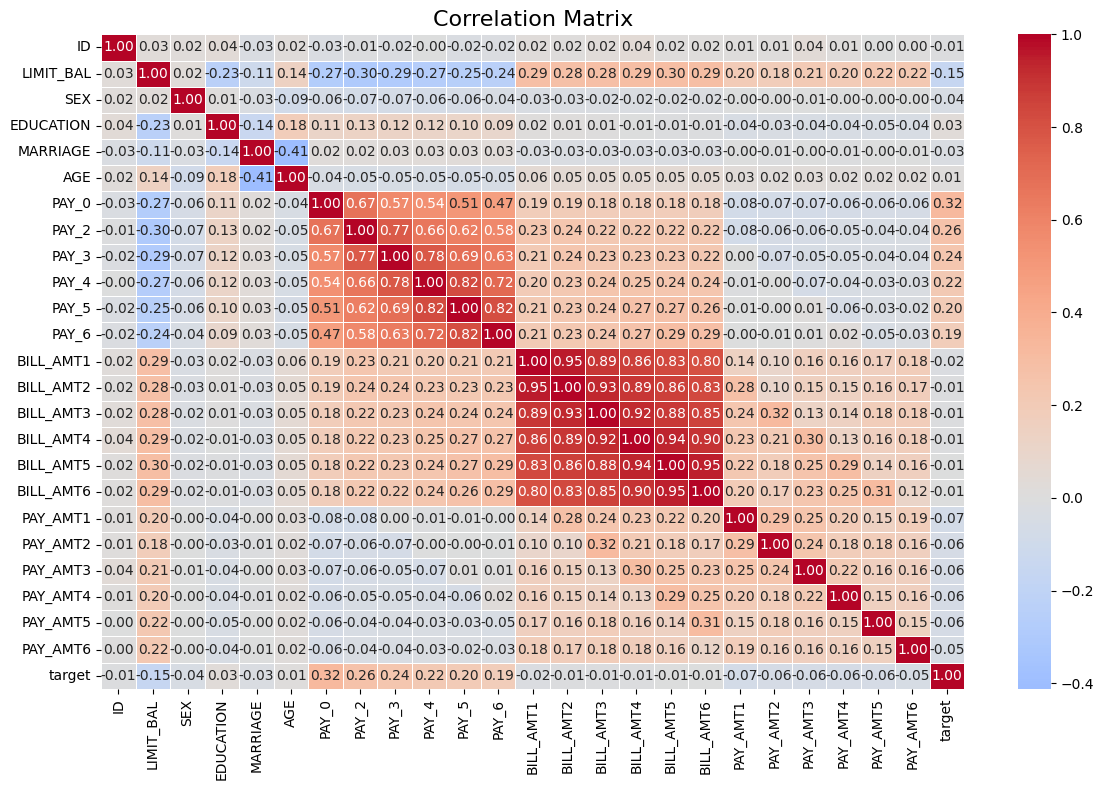

In [ ]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap with an improved color scheme
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True, annot_kws={"size": 10}, center=0)

# Set the title and display the plot
plt.title("Correlation Matrix", fontsize=16)
plt.tight_layout()
plt.show()

**Age**
* Plotting graph of ages in the dataset to see where our data is skewed


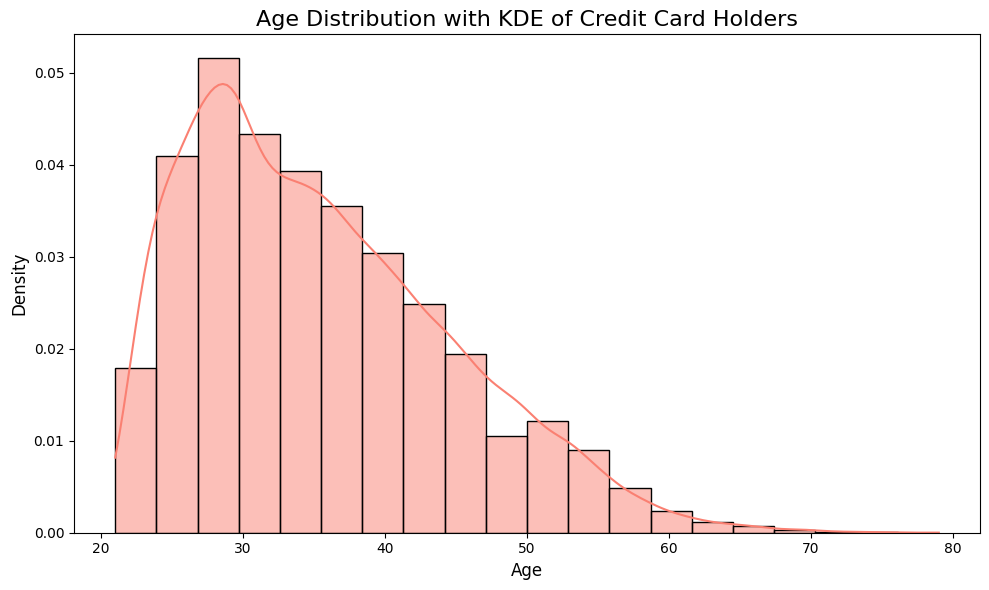

In [ ]:
# Combined histogram and KDE plot
plt.figure(figsize=(10,6))
sns.histplot(df['AGE'], kde=True, bins=20, color='salmon', stat='density')

# Set the title and labels
plt.title('Age Distribution with KDE of Credit Card Holders', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

lets see age distribution for defaulters vs non defaulters


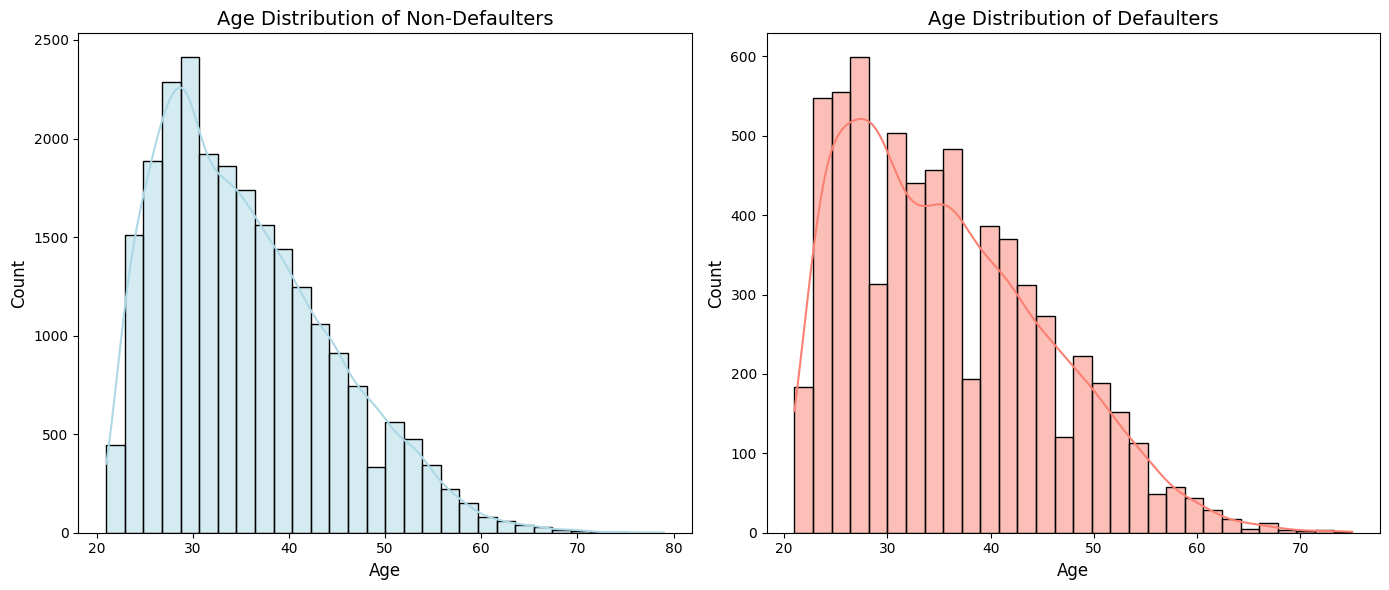

In [ ]:
# Set the figure size
plt.figure(figsize=(14, 6))

# Create two subplots for side-by-side histograms
plt.subplot(1, 2, 1)
sns.histplot(df[df['target'] == 0]['AGE'], kde=True, color='lightblue', bins=30)
plt.title('Age Distribution of Non-Defaulters', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.subplot(1, 2, 2)
sns.histplot(df[df['target'] == 1]['AGE'], kde=True, color='salmon', bins=30)
plt.title('Age Distribution of Defaulters', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


### **Renaming the Columns**

In [ ]:
# Define the month mapping
months = ['SEPT', 'AUG', 'JUL', 'JUN', 'MAY', 'APR']

# Create a function to generate column names
def rename_columns(columns, prefix):
    return {columns[i]: f'{prefix}_{months[i]}' for i in range(len(columns))}

# Define the columns to rename
pay_columns = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
bill_columns = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
pay_amt_columns = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# Rename columns using the function
df.rename(columns={**rename_columns(pay_columns, 'PAY'),
                   **rename_columns(bill_columns, 'BILL_AMT'),
                   **rename_columns(pay_amt_columns, 'PAY_AMT')}, inplace=True)


In [ ]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,target
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.842267,1.557267,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.744494,0.521405,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,1.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


**Pair Plot of various Billing amounts across various months**

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable h

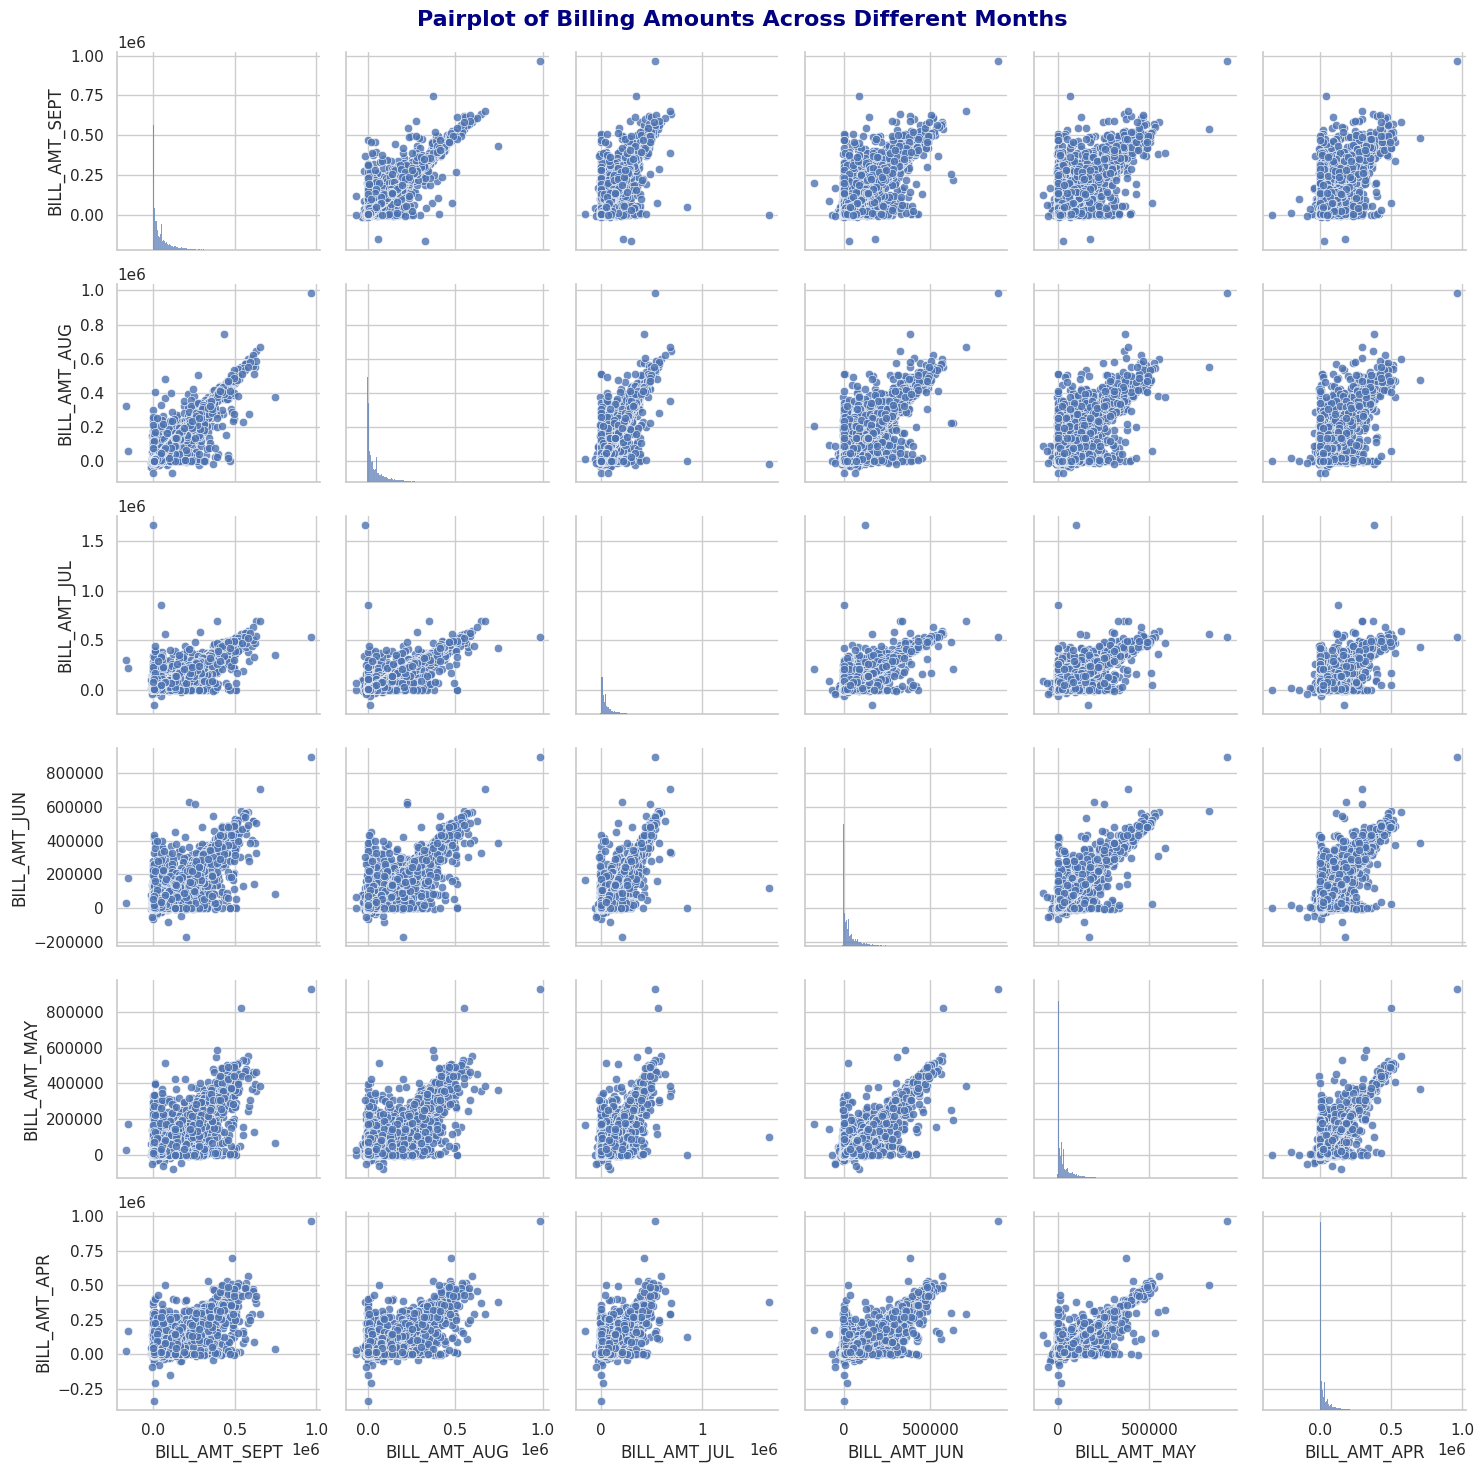

In [ ]:
# Set the style for the plot
sns.set(style="whitegrid")  # You can choose "darkgrid", "white", etc. for the theme

# Subset of the dataframe for the bill amounts
bill_amnt_df = df[['BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JUL',
                   'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR']]

# Create the pairplot
sns.pairplot(data=bill_amnt_df,
             palette="muted",  # Choose a color palette like 'muted', 'Blues', 'Set2', etc.
             plot_kws={'alpha': 0.8},  # Adjust transparency to avoid clutter
             diag_kind="hist",  # Diagonal plots are histograms by default
             height=2.5)  # Control the size of the plot for better clarity

# Add title to the plot
plt.suptitle("Pairplot of Billing Amounts Across Different Months",
             size=16, weight='bold', color='navy', ha='center')

# Show the plot
plt.tight_layout()
plt.show()

**History of Paymnets**

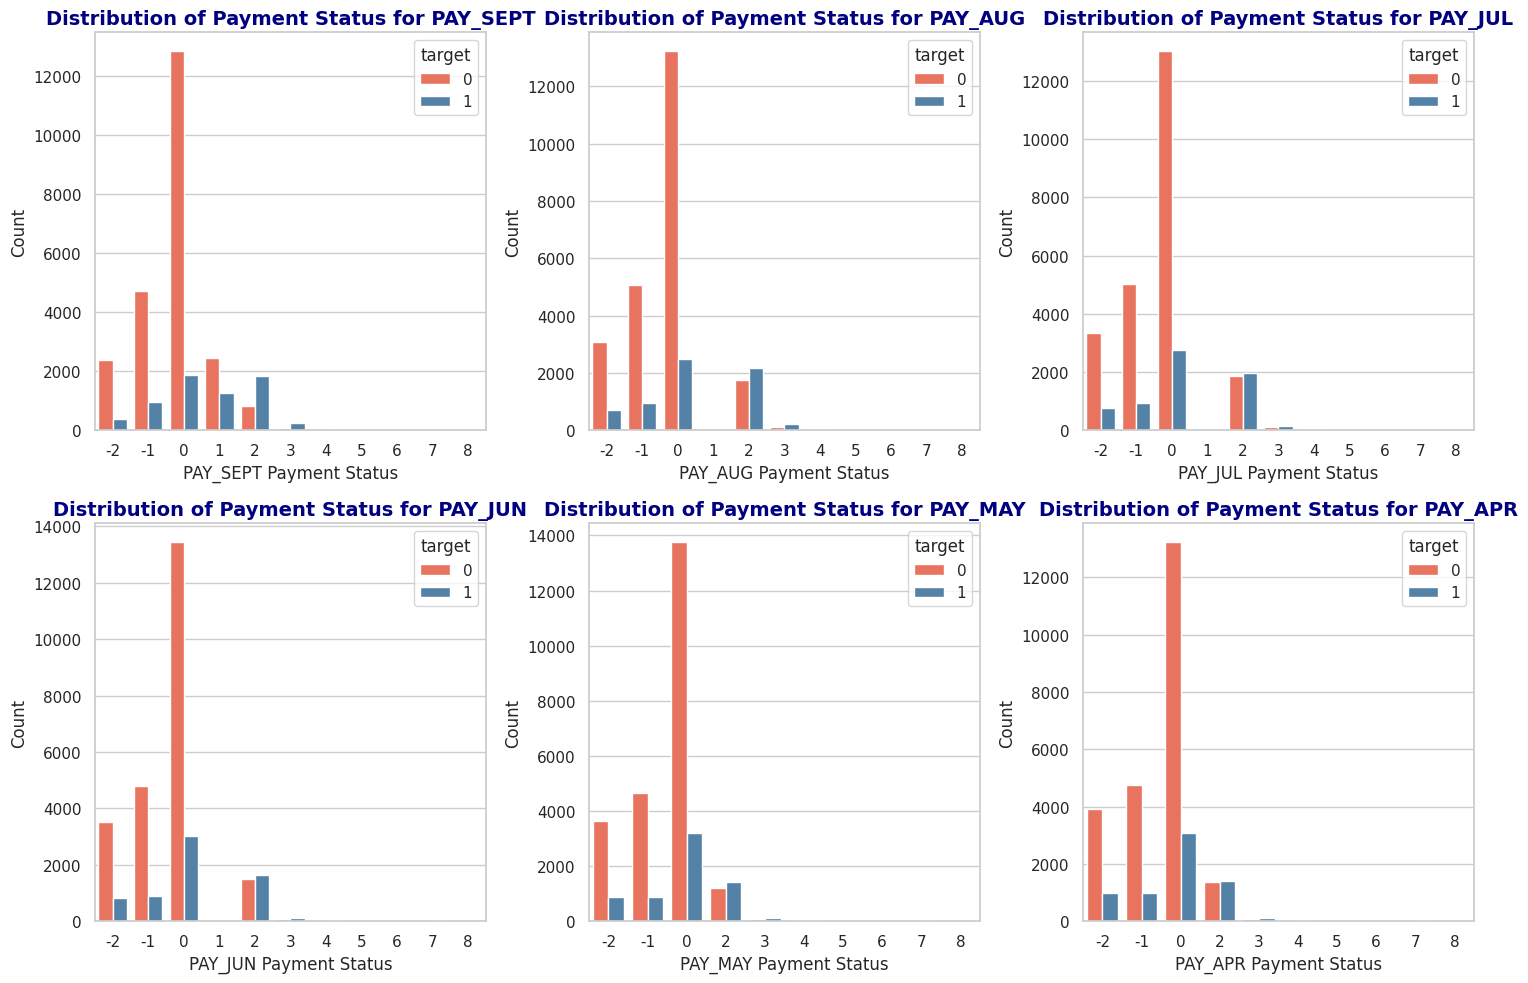

In [ ]:
# Set the plot style
sns.set(style="whitegrid")

# List of columns representing payment status for each month
pay_col = ['PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR']

# Define a custom, stronger color palette
strong_palette = ['#ff6347', '#4682b4']  # Strong Red (for defaulters) and Strong Blue (for non-defaulters)

# Number of rows and columns for the subplot grid
n_rows = 2
n_cols = 3

# Create a subplot grid
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 10))

# Flatten axes array for easier iteration
axes = axes.flatten()

# Loop over each column to create a countplot in the respective subplot
for i, col in enumerate(pay_col):
    sns.countplot(x=col, hue='target', data=df, palette=strong_palette, alpha=1.0, ax=axes[i])

    # Set plot title and labels
    axes[i].set_title(f'Distribution of Payment Status for {col}', size=14, weight='bold', color='navy')
    axes[i].set_xlabel(f'{col} Payment Status', fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)

# Adjust layout for clarity
plt.tight_layout()
plt.show()

## **Lets start Building the Model Now**


In [ ]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,target
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.842267,1.557267,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.744494,0.521405,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,1.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
# Training and Test split
np.random.seed(42)

# Define X (features) and y (target)
X = df.drop(columns=['target'])  # Drop the target column from the feature set
y = df['target']  # Target variable

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)w


In [ ]:
# Import accuracy_score
from sklearn.metrics import accuracy_score

# Put models in a dictionary
models = {'Logistic Regression': LogisticRegression(),
          'KNN': KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
  """
  Fits and evaluates given machine learning models.
  models : a dict of different Scikit-Learn machine learning models
  X_train : training data (no labels)
  X_test : testing data (no labels)
  y_train : training labels
  y_test : test labels
  """
  # Set random seed
  np.random.seed(42)

  # Make a dictionary to keep model scores
  model_scores = {}

  # Loop through models
  for name, model in models.items():
    # Fit the model to the data
    model.fit(X_train, y_train)

    # Predict the labels for X_test
    y_pred = model.predict(X_test)

    # Evaluate the model's accuracy
    accuracy = accuracy_score(y_test, y_pred)
    model_scores[name] = accuracy

  return model_scores

# Get model scores
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

# Display the model scores
model_scores


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7811666666666667,
 'KNN': 0.7508333333333334,
 'Random Forest': 0.815}

**we can see that Random Forest has the highest score**

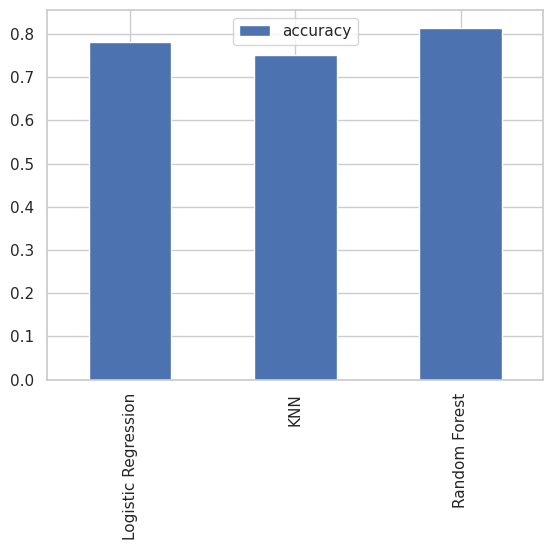

In [ ]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar(); #T is for transpose

so we know Logistic Regression is good but how can we improve it? i.e. how can the baseline model be improve.

We will be working on following:

1. Hyperparameter tuning
2. Feature importance
3. Confusion-matrix
4. cross validation
5. precision
6. recall
7. F1 score
8. classification report
9. ROC curver
10. Area under the curve (AUC)

* 1&2 aapply to any ML model
* rest apply to classification problem only in specific

### **Hyperparameter Tuning**

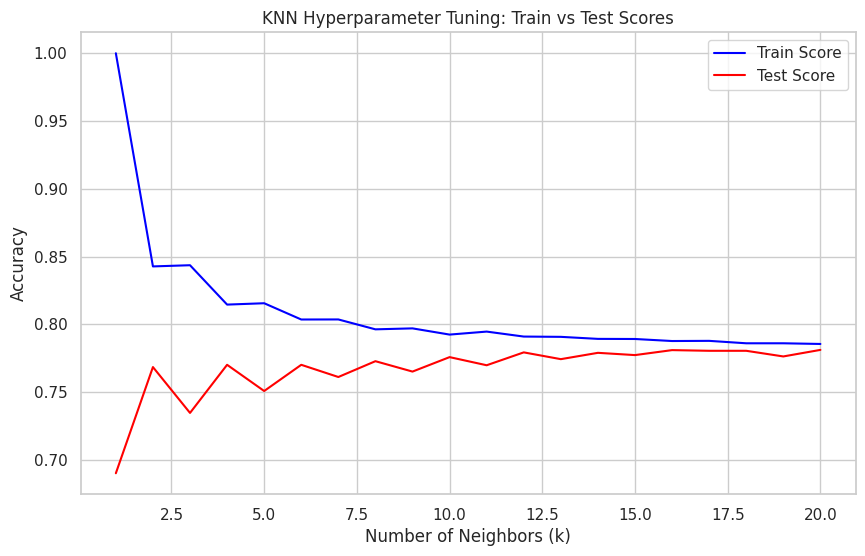

In [ ]:
# Let's tune KNN
train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

# Loop through different n_neighbors
for i in neighbors:
    # Setup KNN instance with the current n_neighbors value
    knn = KNeighborsClassifier(n_neighbors=i)

    # Fit the algorithm on training data
    knn.fit(X_train, y_train)

    # Update the training and test score lists
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

# Plot the results (optional)
plt.figure(figsize=(10, 6))
plt.plot(neighbors, train_scores, label='Train Score', color='blue')
plt.plot(neighbors, test_scores, label='Test Score', color='red')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Hyperparameter Tuning: Train vs Test Scores')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Get the index of the maximum test score
max_test_score_index = test_scores.index(max(test_scores))

# Get the corresponding value of n_neighbors
best_n_neighbors = neighbors[max_test_score_index]

# Print the maximum test score and the best value of n_neighbors
print(f'Maximum KNN score on the test data: {max(test_scores)*100:.2f}%')
print(f'The best value of n_neighbors: {best_n_neighbors}')


Maximum KNN score on the test data: 78.12%
The best value of n_neighbors: 20


## Hyperparameter tuning with RandomizedSearch CV
https://scikit-learn.org/0.16/modules/generated/sklearn.grid_search.RandomizedSearchCV.html#:~:text=Randomized%20search%20on%20hyper%20parameters,is%20optimized%20by%20cross%2Dvalidation.

We are going to tune:
* LogisticRegression()
* RandomForestClassifier()
....using RandomizedSearchCV

CV = cross validation i.e. instead of doing a one train test split, it creates a k fold cross validation (5 is default in SKlearn)

So 5 diff version of train and test data will be created and various versions of hyperparameters will be tested on each of these splits

In [ ]:
# Create a hyperparameter grid for logistic regression
log_reg_grid = {'C': np.logspace(-4, 4, 20),  # logspace returns numbers evenly spaced on a log scale
                'solver': ['liblinear']}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {'n_estimators': np.arange(10, 1000, 50),
           'max_depth': [None, 3, 5, 10],
           'min_samples_split': np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(1, 20, 2)}

\Now we have got hyperparameters grids setup for each model, lets tune these using RandomizedSearchCV

In [ ]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for Logistic Regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5, # 5 fold cross validation
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for Logistic Regression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [ ]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.0001}

In [ ]:
# Lets evaluate
rs_log_reg.score(X_test, y_test)

0.7811666666666667

**Comparision for Logistic Regression**

* Before Hypertuning:0.7811666666666667
* After Hypertuning: 0.7811666666666667

Looks like hyper tynign with Radmoized CV did not help much here


In [ ]:
# Set random seed for reproducibility
np.random.seed(42)

# Optimized hyperparameter grid for RandomForestClassifier
rf_grid_optimized = {
    'n_estimators': np.arange(50, 301, 50),  # Narrow the range of estimators
    'max_depth': [None, 5, 10],  # Restrict depth to smaller values
    'min_samples_split': np.arange(2, 10, 2),  # Reduce range for min_samples_split
    'min_samples_leaf': np.arange(1, 10, 2),  # Reduce range for min_samples_leaf
}

# Setup RandomizedSearchCV with fewer iterations and 3-fold cross-validation
rs_rf_optimized = RandomizedSearchCV(
    RandomForestClassifier(),
    param_distributions=rf_grid_optimized,
    n_iter=10,  # Reduce the number of iterations
    cv=3,  # Use 3-fold cross-validation for faster evaluation
    verbose=True,
    n_jobs=-1,  # Use all available CPUs for parallel processing
    random_state=42
)

# Fit the optimized RandomizedSearchCV
rs_rf_optimized.fit(X_train, y_train)

# Get the best model
best_model = rs_rf_optimized.best_estimator_

# Print best hyperparameters found by RandomizedSearchCV
print("Best Hyperparameters:", rs_rf_optimized.best_params_)

# Evaluate the best model on the test set
test_score = best_model.score(X_test, y_test)
print(f"Test Accuracy: {test_score * 100:.2f}%")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Hyperparameters: {'n_estimators': 150, 'min_samples_split': 6, 'min_samples_leaf': 5, 'max_depth': 10}
Test Accuracy: 82.03%


**Comparision for Random Forest Classifier**

* Before Hypertuning: 81.5%
* After Hypertuning: 82.03%

Looks like hyper tynign with Radmoized CV helped improve the score here


## Evaluting ML calssifier, beyond accuracy

* ROC curve and AUC score
* COnfusion matrix
* Classfication report
* Recall
* F1-score

... and it would be great if cross validation was used where possible.

**Note:** to maker comparisions and evaluate our trained model, first we need to make predictions

**Create Synthetic Data to Make some Predictions**


In [ ]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Number of rows in the dataset
num_rows = 3000

# Generate synthetic data
data = {
    "ID": np.arange(1, num_rows + 1),
    "LIMIT_BAL": np.random.choice([20000, 50000, 80000, 120000, 140000, 170000, 200000], size=num_rows),
    "SEX": np.random.choice([1, 2], size=num_rows),  # 1 = male, 2 = female
    "EDUCATION": np.random.choice([1, 2, 3], size=num_rows),  # 1 = graduate, 2 = university, 3 = high school
    "MARRIAGE": np.random.choice([1, 2, 3], size=num_rows),  # 1 = married, 2 = single, 3 = others
    "AGE": np.random.randint(21, 70, size=num_rows),
}

# Generate PAY_* columns (payment statuses for different months)
for month in ["SEPT", "AUG", "JUL", "JUN", "MAY", "APR"]:
    data[f"PAY_{month}"] = np.random.choice([-2, -1, 0, 1, 2], size=num_rows)

# Generate BILL_AMT_* columns (bill amounts for different months)
for month in ["SEPT", "AUG", "JUL", "JUN", "MAY", "APR"]:
    data[f"BILL_AMT_{month}"] = np.random.randint(0, 100000, size=num_rows)

# Generate PAY_AMT_* columns (payment amounts for different months)
for month in ["SEPT", "AUG", "JUL", "JUN", "MAY", "APR"]:
    data[f"PAY_AMT_{month}"] = np.random.randint(0, 5000, size=num_rows)

# Generate target column
data["target"] = np.random.choice([0, 1], size=num_rows)

# Convert to pandas DataFrame
synthetic_df = pd.DataFrame(data)

# Display the first few rows
print(synthetic_df.head())

# Save to a CSV file if needed
synthetic_df.to_csv("synthetic_data.csv", index=False)


   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_SEPT  PAY_AUG  PAY_JUL  \
0   1     200000    1          1         1   49         0        0       -1   
1   2     120000    2          2         3   24        -2       -1        2   
2   3     140000    2          1         1   30         1        0        2   
3   4     200000    2          2         1   45         0        2        2   
4   5      80000    1          3         1   51         2        1        0   

   PAY_JUN  ...  BILL_AMT_JUN  BILL_AMT_MAY  BILL_AMT_APR  PAY_AMT_SEPT  \
0        1  ...         64396         66270         26085           284   
1        1  ...         77145         71214         38086           718   
2        0  ...         33588         36077         63493          3988   
3        0  ...         64202         90482         53186           501   
4       -2  ...         92128         26649         48248           257   

   PAY_AMT_AUG  PAY_AMT_JUL  PAY_AMT_JUN  PAY_AMT_MAY  PAY_AMT_APR  target

In [ ]:
synthetic_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,target
0,1,200000,1,1,1,49,0,0,-1,1,...,64396,66270,26085,284,4147,1920,4479,3882,2740,1
1,2,120000,2,2,3,24,-2,-1,2,1,...,77145,71214,38086,718,4389,2472,2933,4166,1950,1
2,3,140000,2,1,1,30,1,0,2,0,...,33588,36077,63493,3988,2347,958,1314,637,2435,0
3,4,200000,2,2,1,45,0,2,2,0,...,64202,90482,53186,501,1591,3287,1815,4562,2827,0
4,5,80000,1,3,1,51,2,1,0,-2,...,92128,26649,48248,257,2241,1071,4278,2641,180,1


In [ ]:
# Drop the 'target' column and save the remaining data into X_test
X_test = synthetic_df.drop(columns=["target"])

# Display the first few rows of X_test to confirm
print(X_test.head())


   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_SEPT  PAY_AUG  PAY_JUL  \
0   1     200000    1          1         1   49         0        0       -1   
1   2     120000    2          2         3   24        -2       -1        2   
2   3     140000    2          1         1   30         1        0        2   
3   4     200000    2          2         1   45         0        2        2   
4   5      80000    1          3         1   51         2        1        0   

   PAY_JUN  ...  BILL_AMT_JUL  BILL_AMT_JUN  BILL_AMT_MAY  BILL_AMT_APR  \
0        1  ...         96284         64396         66270         26085   
1        1  ...         97260         77145         71214         38086   
2        0  ...         47753         33588         36077         63493   
3        0  ...         54428         64202         90482         53186   
4       -2  ...         43038         92128         26649         48248   

   PAY_AMT_SEPT  PAY_AMT_AUG  PAY_AMT_JUL  PAY_AMT_JUN  PAY_AMT_MAY  \
0  

In [ ]:
# Make predictions using the best model on X_test
y_preds = best_model.predict(X_test)



In [ ]:
y_preds

array([0, 0, 0, ..., 1, 0, 0])

## **Feature Importance**


Feature importance is another as asking, "Which features contributed most to the outcomes of hte model and how did they contribute?"

Find fearture importnace is diff from each machine learning model

https://stackoverflow.com/questions/34052115/how-to-find-the-importance-of-the-features-for-a-logistic-regression-model

Onw way to find featyure importnbat is: "(MODEL NAME) feature importance"

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,target
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier


# Define X (features) and y (target)
X = df.drop(columns=['target'])  # Drop the target column from the feature set
y = df['target']  # Target variable

# Initialize the RandomForestClassifier with the optimized parameters
rf = RandomForestClassifier(n_estimators=150, min_samples_split=6, min_samples_leaf=5, max_depth=10, random_state=42)

# Fit the model
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the sorted feature importances
print(feature_importance_df)


          Feature  Importance
6        PAY_SEPT    0.258593
7         PAY_AUG    0.127199
8         PAY_JUL    0.075031
9         PAY_JUN    0.056552
10        PAY_MAY    0.044792
18   PAY_AMT_SEPT    0.037257
11        PAY_APR    0.035353
1       LIMIT_BAL    0.034023
12  BILL_AMT_SEPT    0.032371
20    PAY_AMT_JUL    0.027418
19    PAY_AMT_AUG    0.026964
13   BILL_AMT_AUG    0.026547
0              ID    0.026504
21    PAY_AMT_JUN    0.024230
14   BILL_AMT_JUL    0.023546
17   BILL_AMT_APR    0.022351
23    PAY_AMT_APR    0.022211
15   BILL_AMT_JUN    0.021892
16   BILL_AMT_MAY    0.021850
22    PAY_AMT_MAY    0.021676
5             AGE    0.020332
3       EDUCATION    0.006275
4        MARRIAGE    0.003583
2             SEX    0.003451


From the feature importance output, we can observe that the following attributes have the highest importance in predicting credit card default risk:

* PAY_SEPT (0.258593): This feature stands out significantly, indicating that a customer's payment status in September is a major predictor of default risk.
* PAY_AUG (0.127199) and PAY_JUL (0.075031): These payment status features from the preceding months (August and July) also carry significant weight, suggesting that a customer's recent payment history plays a crucial role in predicting future default.
* LIMIT_BAL (0.034023): The credit limit balance is another important feature, which is expected as higher balances often correlate with higher default risk due to increased debt load.
* BILL_AMT_SEPT (0.032371): The bill amount for September is another significant feature, linking higher bill amounts to increased risk of default.
* PAY_AMT_SEPT (0.037257): The payment amount made in September also contributes to the prediction, suggesting that larger payments may correlate with lower risk.
* AGE (0.020332): The age of the customer seems to be a lesser but still relevant factor in the prediction, with younger individuals potentially displaying higher default risk.
* EDUCATION (0.006275) and MARRIAGE (0.003583): These features seem to have minimal importance, suggesting they may not be as strong predictors of default risk.

**Bottom Line:** The features related to payment history (PAY_ columns) seem to have the most significant impact, which is typical when assessing the likelihood of credit card defaults. Regularly tracking payment status and amounts is crucial. Other features, such as credit limit and bill amounts, are important but less influential than payment-related variables.

**Observations:**
* Payment Behavior: The patterns from PAY_ columns show a strong relationship with default risk, with a noticeable decrease in importance as you move backward through the months. This makes sense because recent payments are often the best predictor of future payment behavior.

* Credit Balance and Bill Amounts: The features LIMIT_BAL and BILL_AMT_ are critical in understanding the financial burden the customer carries, which affects their ability to meet future payments.

* Demographic Features: Features like AGE, EDUCATION, and MARRIAGE have lower importance, indicating they may not be as predictive of default risk compared to payment behavior and financial indicators.

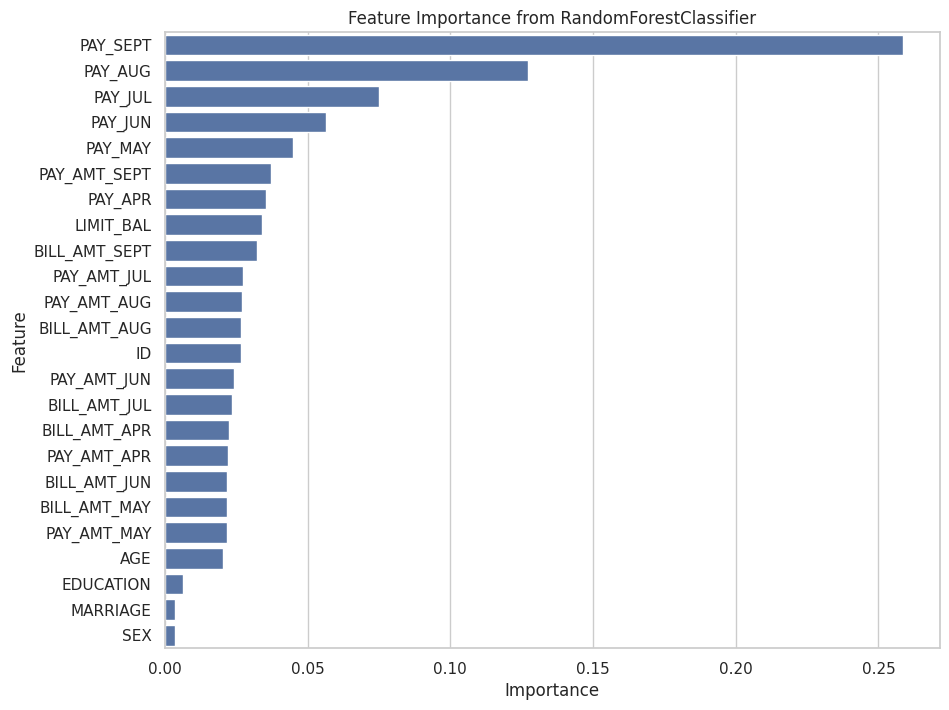

In [ ]:
# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from RandomForestClassifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

**Permutation importance** assesses the impact of each feature by measuring the change in model performance when the feature's values are shuffled. This method is model-agnostic and can provide a more accurate assessment of feature importance.

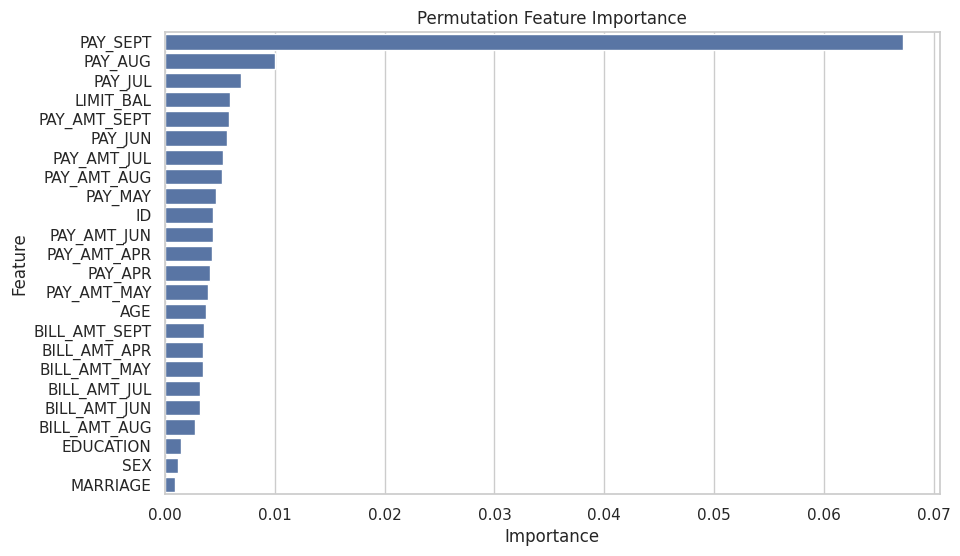

In [ ]:
from sklearn.inspection import permutation_importance

# Compute permutation importance
result = permutation_importance(rf, X, y, n_repeats=10, random_state=42)

# Create a DataFrame for visualization
perm_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': result.importances_mean
})

# Sort the DataFrame by importance
perm_importance_df = perm_importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=perm_importance_df)
plt.title('Permutation Feature Importance')
plt.show()

**heat map:** Visualizing correlations between features can help identify multicollinearity, which may affect feature importance assessments.

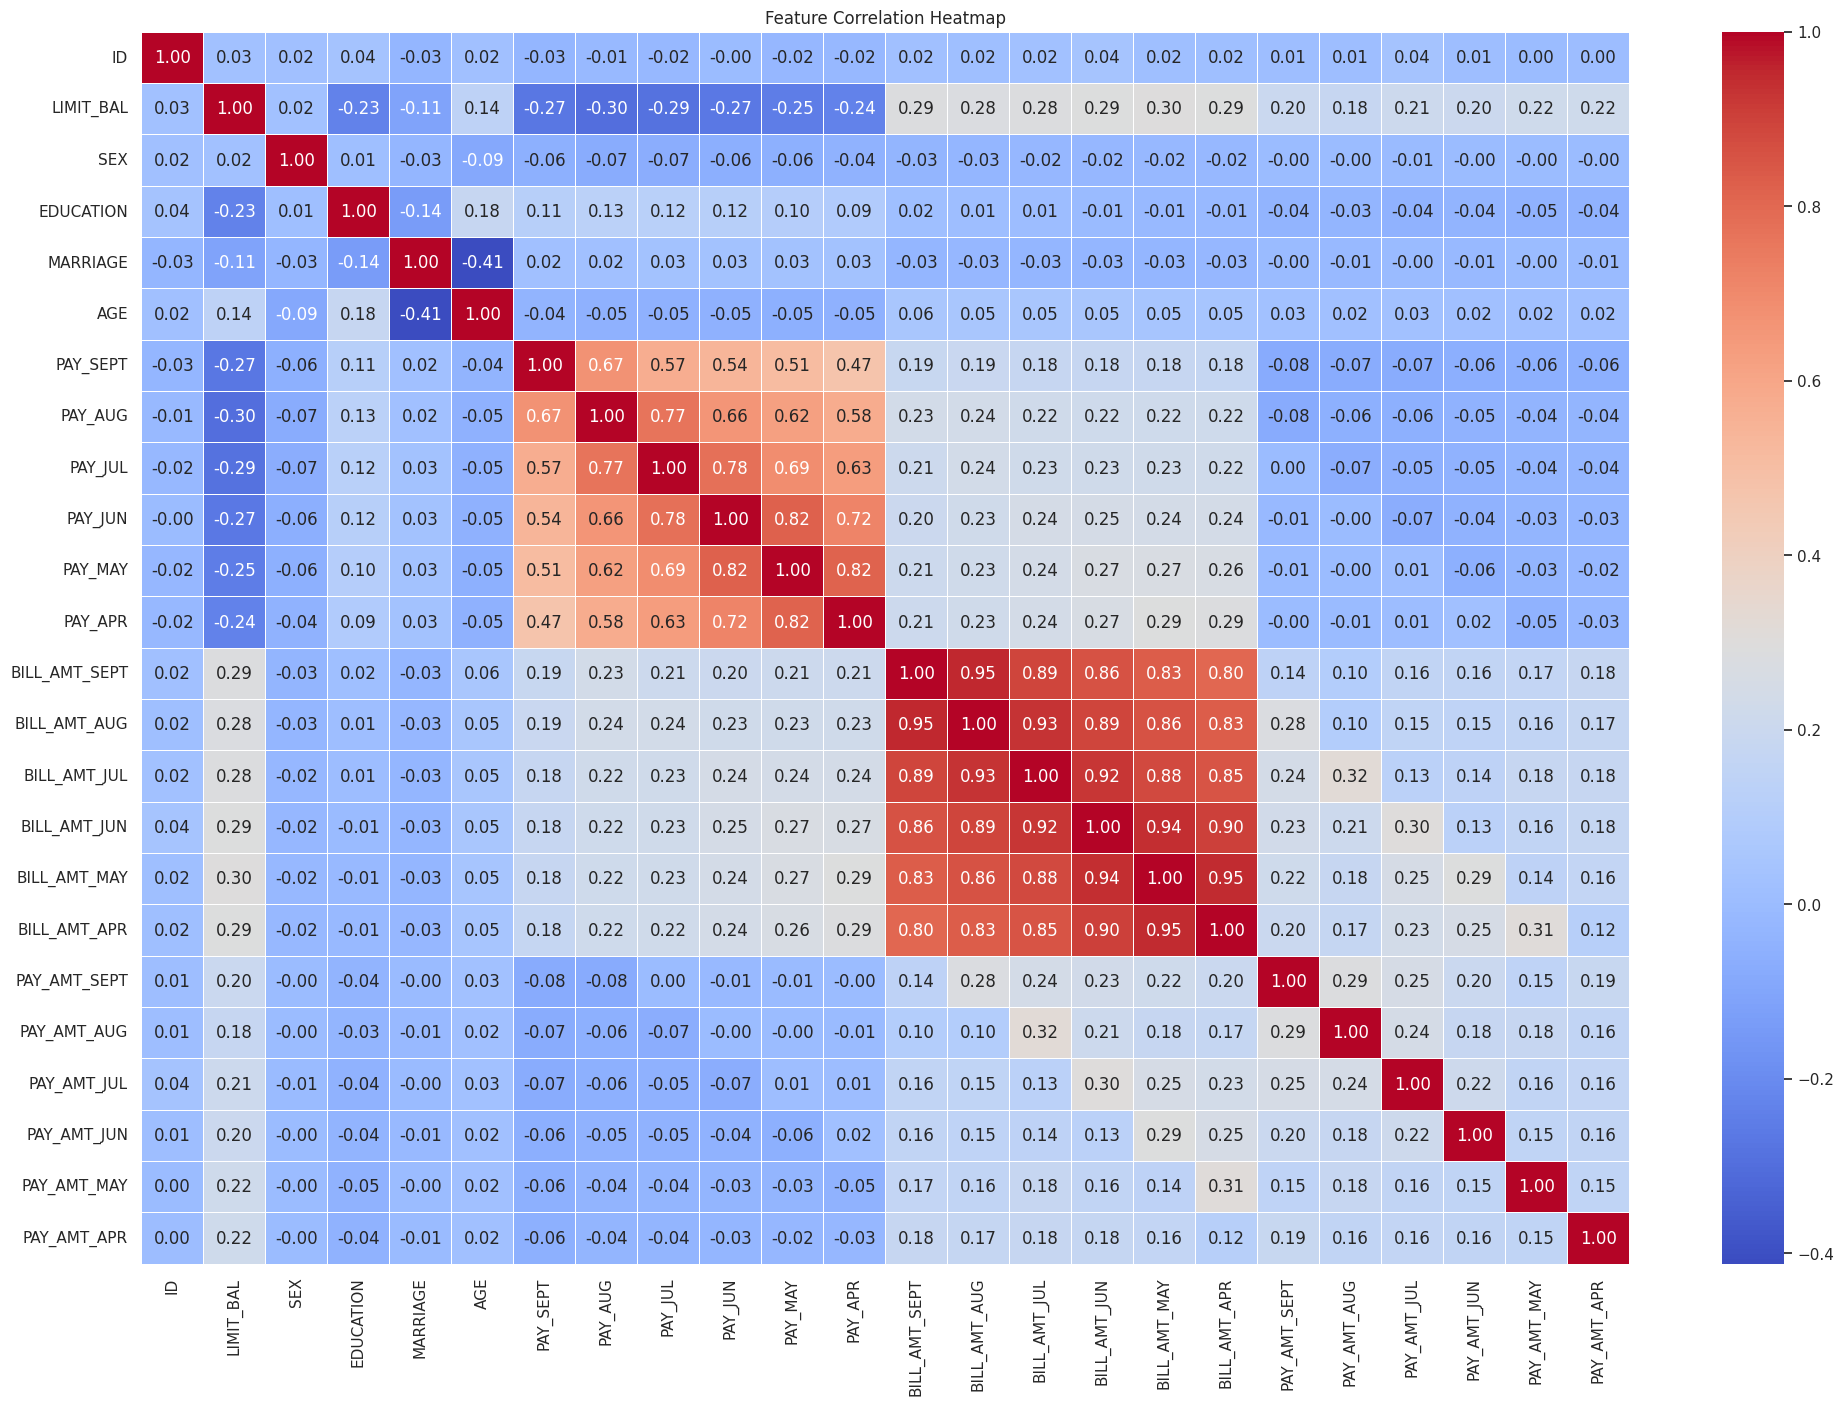

In [ ]:
# Compute correlation matrix
corr = X.corr()

# Plot heatmap
plt.figure(figsize=(24, 16))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

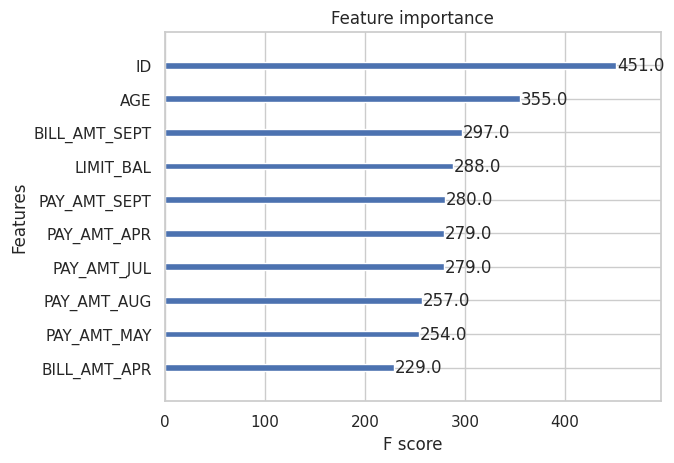

In [ ]:
import xgboost as xgb
from xgboost import plot_importance

# Fit the model
model = xgb.XGBClassifier()
model.fit(X, y)

# Plot feature importance
plot_importance(model, importance_type='weight', max_num_features=10)
plt.show()

# **Final Word**

Based on feature importance output, it seems that the findings do align well with many of the industry specific key predictors of credit card default.

* **Payment History:** Features like PAY_SEPT, PAY_AUG, and PAY_JUL (monthly payment status) are the most important in your model, which matches real-life understanding. Payment history is a dominant factor in predicting defaults, and your model highlights the importance of recent payment behavior.

* **Credit Utilization and Limits:** LIMIT_BAL (credit limit) appears in your feature importance list, which is consistent with real-life models. However, other indicators of credit utilization, such as balance-to-limit ratios, aren't explicitly shown in your data but could be implied through features like BILL_AMT_ and PAY_AMT_.

* **Outstanding Balances:** Your dataset includes features like BILL_AMT_ (bill amounts) and PAY_AMT_ (payment amounts), which are indirectly related to the amount of debt the consumer carries. While your model might not explicitly calculate debt-to-income ratios, the high importance of bill amounts supports the idea that outstanding balances influence default risk.

* **Demographics (Age, Education, Marriage):** AGE appears as a factor, though it has relatively lower importance. This is aligned with real life, where age is a secondary factor but still relevant. EDUCATION and MARRIAGE are not as significant in your model, which is consistent with how these features tend to have weaker predictive power compared to financial behavior and history.

## **Key Takeaways:**
* **Payment Behavior** (PAY_ features) is paramount, aligning perfectly with real-world data.
* **Credit Limits and Bill Amounts** are also significant, supporting the role of financial obligations in default prediction.
* **Demographic Features** like **AGE** show some influence but are less predictive, which aligns with how these features are often considered supplementary in real-world credit scoring models.
